In [1]:
# data : https://www.smard.de/home/downloadcenter/download-marktdaten#!?downloadAttributes=%7B%22selectedCategory%22:3,%22selectedSubCategory%22:8,%22selectedRegion%22:%22DE%22,%22from%22:1658613600000,%22to%22:1659563999999,%22selectedFileType%22:%22CSV%22%7D

In [39]:
import pandas as pd
import pickle
from pathlib import Path
import numpy as np
import sklearn.preprocessing 
import matplotlib.pyplot as plt

In [3]:
df_smard = pd.read_csv('../data/energy_data/elect_price_2022.csv', delimiter=';', decimal=',', parse_dates=[['Datum', 'Uhrzeit']])
df_smard.tail()

,Datum_Uhrzeit,Deutschland/Luxemburg[€/MWh],∅ Anrainer DE/LU[€/MWh],Belgien[€/MWh],Dänemark 1[€/MWh],Dänemark 2[€/MWh],Frankreich[€/MWh],Niederlande[€/MWh],Norwegen 2[€/MWh],Österreich[€/MWh],Polen[€/MWh],Schweden 4[€/MWh],Schweiz[€/MWh],Tschechien[€/MWh],DE/AT/LU[€/MWh],Italien (Nord)[€/MWh],Slowenien[€/MWh],Ungarn[€/MWh]
7291,2022-10-31 19:00:00,167.81,"166,59",168.00,167.81,167.81,"168,22",167.96,162.95,165.64,166.39,162.95,"166,87",167.90,-,"173,62",173.62,"169,06"
7292,2022-10-31 20:00:00,147.09,"146,51",147.20,147.09,147.09,"147,3",147.17,142.72,145.97,147.01,142.72,"150,19",147.14,-,"149,99",149.99,"147,73"
7293,2022-10-31 21:00:00,136.78,"136,31",136.78,136.78,136.78,"136,78",136.78,132.81,136.78,136.78,132.81,"139,59",136.78,-,"136,78",136.78,"136,78"
7294,2022-10-31 22:00:00,120.51,"121,29",120.36,120.51,120.51,"120,85",119.90,116.77,124.23,134.39,101.16,"130,63",124.88,-,"125,13",125.13,"126,99"
7295,2022-10-31 23:00:00,100.73,-,100.42,100.73,100.73,"101,3",100.00,100.73,106.07,114.74,44.24,-,105.59,-,"115,63",106.92,"108,08"


In [4]:
ser_energy_price_germany = df_smard[['Datum_Uhrzeit', 'Deutschland/Luxemburg[€/MWh]']]
print(f"Type: {type(ser_energy_price_germany)}")
ser_energy_price_germany.head()

Type: <class 'pandas.core.frame.DataFrame'>


,Datum_Uhrzeit,Deutschland/Luxemburg[€/MWh]
0,2022-01-01 00:00:00,50.05
1,2022-01-01 01:00:00,41.33
2,2022-01-01 02:00:00,43.22
3,2022-01-01 03:00:00,45.46
4,2022-01-01 04:00:00,37.67


In [5]:
type(ser_energy_price_germany['Datum_Uhrzeit'])

pandas.core.series.Series

In [6]:
mask = ser_energy_price_germany['Datum_Uhrzeit'].duplicated()

print(ser_energy_price_germany[mask])

           Datum_Uhrzeit  Deutschland/Luxemburg[€/MWh]
7250 2022-10-30 02:00:00                         99.92


In [7]:
ser_energy_price_germany = ser_energy_price_germany.drop_duplicates(subset=['Datum_Uhrzeit'])

In [8]:
idx = ser_energy_price_germany['Datum_Uhrzeit']
val = ser_energy_price_germany['Deutschland/Luxemburg[€/MWh]']
ser = val.set_axis(idx, axis=0)

In [9]:
ser.head()

Datum_Uhrzeit
2022-01-01 00:00:00    50.05
2022-01-01 01:00:00    41.33
2022-01-01 02:00:00    43.22
2022-01-01 03:00:00    45.46
2022-01-01 04:00:00    37.67
Name: Deutschland/Luxemburg[€/MWh], dtype: float64

In [10]:
ser.tail()

Datum_Uhrzeit
2022-10-31 19:00:00    167.81
2022-10-31 20:00:00    147.09
2022-10-31 21:00:00    136.78
2022-10-31 22:00:00    120.51
2022-10-31 23:00:00    100.73
Name: Deutschland/Luxemburg[€/MWh], dtype: float64

In [11]:
ser_sept = ser.loc["2022-09-01 00:00:00":"2022-09-30 23:00:00"]
ser_oct = ser.loc["2022-10-01 00:00:00":"2022-10-31 23:00:00"]

In [12]:
ser_sept.tail()

Datum_Uhrzeit
2022-09-10 19:00:00    258.74
2022-09-10 20:00:00    178.58
2022-09-10 21:00:00    147.61
2022-09-10 22:00:00    122.35
2022-09-10 23:00:00     99.86
Name: Deutschland/Luxemburg[€/MWh], dtype: float64

In [13]:
ser_oct.tail()

Datum_Uhrzeit
2022-10-31 19:00:00    167.81
2022-10-31 20:00:00    147.09
2022-10-31 21:00:00    136.78
2022-10-31 22:00:00    120.51
2022-10-31 23:00:00    100.73
Name: Deutschland/Luxemburg[€/MWh], dtype: float64

In [14]:
# Preprocessing: Using MinMaxScaler
# Since the data is static it might be better to do it once than before every training



In [15]:
#upsamled_ser = ser.resample('60s').pad()
#TODO: to datetime?? search for resample
upsamled_ser_sept = ser_sept.resample('60s').pad()
upsamled_ser_oct = ser_oct.resample('60s').pad()

/var/folders/2r/90tp356168b7h1_rljqp94f00000gn/T/ipykernel_11619/2707062605.py:3: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  upsamled_ser_sept = ser_sept.resample('60s').pad()
/var/folders/2r/90tp356168b7h1_rljqp94f00000gn/T/ipykernel_11619/2707062605.py:4: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  upsamled_ser_oct = ser_oct.resample('60s').pad()


In [16]:
upsamled_ser_sept.tail()

Datum_Uhrzeit
2022-09-30 22:56:00    164.00
2022-09-30 22:57:00    164.00
2022-09-30 22:58:00    164.00
2022-09-30 22:59:00    164.00
2022-09-30 23:00:00     91.95
Freq: 60S, Name: Deutschland/Luxemburg[€/MWh], dtype: float64

In [17]:
upsamled_ser_oct.tail()

Datum_Uhrzeit
2022-10-31 22:56:00    120.51
2022-10-31 22:57:00    120.51
2022-10-31 22:58:00    120.51
2022-10-31 22:59:00    120.51
2022-10-31 23:00:00    100.73
Freq: 60S, Name: Deutschland/Luxemburg[€/MWh], dtype: float64

In [18]:
# Euro/ MWh to Euro/ kWmin
rescaled_ser_sept = upsamled_ser_sept.mul(1/(1000*60))
rescaled_ser_oct = upsamled_ser_oct.mul(1/(1000*60))

In [19]:
rescaled_ser_sept.tail()

Datum_Uhrzeit
2022-09-30 22:56:00    0.002733
2022-09-30 22:57:00    0.002733
2022-09-30 22:58:00    0.002733
2022-09-30 22:59:00    0.002733
2022-09-30 23:00:00    0.001533
Freq: 60S, Name: Deutschland/Luxemburg[€/MWh], dtype: float64

In [20]:
rescaled_ser_oct.tail()

Datum_Uhrzeit
2022-10-31 22:56:00    0.002009
2022-10-31 22:57:00    0.002009
2022-10-31 22:58:00    0.002009
2022-10-31 22:59:00    0.002009
2022-10-31 23:00:00    0.001679
Freq: 60S, Name: Deutschland/Luxemburg[€/MWh], dtype: float64

In [21]:
energy_price_lst_sept = rescaled_ser_sept.to_list()

with open('../data/energy_data/elect_price_sept_kwmin.pkl', 'wb') as outfile:
    pickle.dump(energy_price_lst_sept, outfile)

In [22]:
np_arr = rescaled_ser_oct.to_numpy()

In [23]:
print(np_arr)

[0.0032705  0.0032705  0.0032705  ... 0.0020085  0.0020085  0.00167883]


In [24]:
energy_price_lst_oct = rescaled_ser_oct.to_list()

#with open('../data/energy_data/elect_price_oct_kwmin.pkl', 'wb') as outfile:
    #pickle.dump(energy_price_lst_sept, outfile)

In [25]:
energy_price_lst_sept_oct = energy_price_lst_sept.append(energy_price_lst_oct)
#with open('../data/energy_data/elect_price_sept_oct_kwmin.pkl', 'wb') as outfile:
    #pickle.dump(energy_price_lst_sept_oct, outfile)

<AxesSubplot: xlabel='Datum_Uhrzeit'>

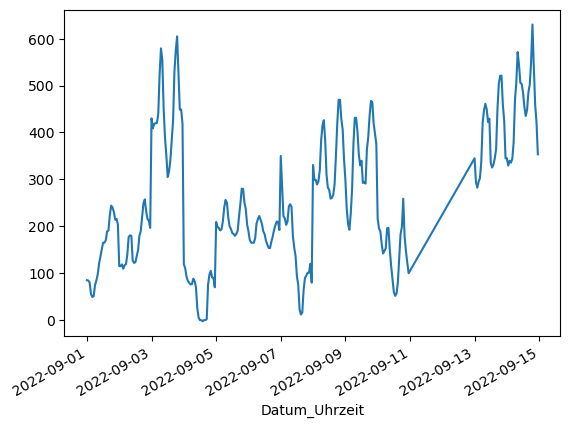

In [26]:
### Generate 14 days ahead data
### MinMax and true values

ser_sept_14_days = ser_sept.loc["2022-09-01 00:00:00":"2022-09-14 23:00:00"]

ser_sept_14_days.plot()

In [29]:

print(f"min: {ser_sept_14_days.min()}")
print(f"max: {ser_sept_14_days.max()}")


min: -2.49
max: 630.25


In [42]:
ser_sept_14_days = ser_sept.loc["2022-09-01 00:00:00":"2022-09-14 23:00:00"]
upsampled_ser_sept_14_days = ser_sept_14_days.resample('60s').pad()
np_arr = upsampled_ser_sept_14_days.to_numpy()


# We need both a rescaled dataset wrt. the units and a MinMax Scaled
rescaled_ser_sept_14_days = np_arr*(1/(1000*60))

# MinMax
scaled_data = sklearn.preprocessing.minmax_scale(np_arr)

# save data

np.save("../data/energy_data/price_sept_14_days.npy", rescaled_ser_sept_14_days)
np.save("../data/energy_data/price_MinMax_sept_14_days.npy", scaled_data)


/var/folders/2r/90tp356168b7h1_rljqp94f00000gn/T/ipykernel_11619/2418538717.py:2: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  upsampled_ser_sept_14_days = ser_sept_14_days.resample('60s').pad()


In [30]:
print(9.9860e+01)

99.86


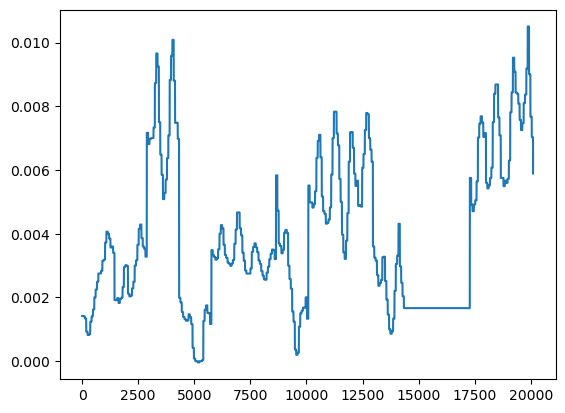

In [45]:
plt.plot(rescaled_ser_sept_14_days)
plt.show()